In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
df=pd.read_excel('Task3.xlsx')

In [70]:
df.head()

,transaction_id,pay_date,user_id,name,price,month_access,order_description,status,first_date,first_month_year_deal,ym
0,52309,2017-03-01,46796,Наталья,590,1,Подписка на 1 месяц,Successful,2017-03-01,2017-03,2017-03
1,52370,2017-03-02,49343,Сергей Плешаков,590,1,Подписка на 1 месяц,Successful,2017-03-02,2017-03,2017-03
2,52393,2017-03-02,50693,Алеся Бията,1470,3,Подписка на 3 месяца,Successful,2017-03-02,2017-03,2017-03
3,52358,2017-03-02,51467,Лия,590,1,Подписка на 1 месяц,Successful,2017-03-02,2017-03,2017-03
4,52246,2017-03-03,35265,Анастасия Высочинская,2340,6,Подписка на 6 месяцев,Successful,2017-03-03,2017-03,2017-03


## Создаем три столбца: first_date - дата первой сделки каждого user_id, first_month_year_deal - переводим дату первой сделки в формат "Год-месяц", ym - это pay_date в формате "Год-месяц"


In [66]:
df['first_date'] = df.groupby('user_id')['pay_date'].transform('min')

df['first_month_year_deal'] = df['first_date'].dt.strftime('%Y-%m')
df['ym'] = df['pay_date'].dt.strftime('%Y-%m')

df

,transaction_id,pay_date,user_id,name,price,month_access,order_description,status,first_date,first_month_year_deal,ym
0,52309,2017-03-01,46796,Наталья,590,1,Подписка на 1 месяц,Successful,2017-03-01,2017-03,2017-03
1,52370,2017-03-02,49343,Сергей Плешаков,590,1,Подписка на 1 месяц,Successful,2017-03-02,2017-03,2017-03
2,52393,2017-03-02,50693,Алеся Бията,1470,3,Подписка на 3 месяца,Successful,2017-03-02,2017-03,2017-03
3,52358,2017-03-02,51467,Лия,590,1,Подписка на 1 месяц,Successful,2017-03-02,2017-03,2017-03
4,52246,2017-03-03,35265,Анастасия Высочинская,2340,6,Подписка на 6 месяцев,Successful,2017-03-03,2017-03,2017-03
...,...,...,...,...,...,...,...,...,...,...,...
2543,105162,2017-10-31,833154,Алексей,590,1,Подписка на 1 месяц,Successful,2017-10-01,2017-10,2017-10
2544,102930,2017-10-31,984982,Виктория Попова,590,1,Подписка на 1 месяц,Successful,2017-10-31,2017-10,2017-10
2545,104902,2017-10-31,1071653,Евгений,590,1,Подписка на 1 месяц,Successful,2017-10-31,2017-10,2017-10
2546,104924,2017-10-31,1073134,Максим,590,1,Подписка на 1 месяц,Successful,2017-10-31,2017-10,2017-10


## Строим двухмерную сводную табличку(шахматку) с расчетом количества уникальных пользователей по каждому месяцу первой сделки и по каждому месяцу

In [67]:
cohorts = pd.pivot_table(
    df,
    index='first_month_year_deal',
    columns='ym',
    values='user_id',
    aggfunc='nunique'
).fillna(0).astype(int)

cohorts

ym,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10
first_month_year_deal,,,,,,,,
2017-03,125,42,20,17,18,0,0,0
2017-04,0,155,67,35,24,14,0,0
2017-05,0,0,132,54,31,20,14,0
2017-06,0,0,0,137,60,31,24,22
2017-07,0,0,0,0,194,68,32,36
2017-08,0,0,0,0,0,202,100,62
2017-09,0,0,0,0,0,0,330,121
2017-10,0,0,0,0,0,0,0,346


## Переводим табличку в проценты, чтобы продемонстрировать какая доля пользователей вновь совершила сделку в n+m месяце от месяца первой сделки

In [68]:
diags = np.diag(cohorts)

cohorts = cohorts.div(diags, axis=0)

cohorts

ym,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10
first_month_year_deal,,,,,,,,
2017-03,1.0,0.336,0.160000,0.136000,0.144000,0.000000,0.000000,0.000000
2017-04,0.0,1.000,0.432258,0.225806,0.154839,0.090323,0.000000,0.000000
2017-05,0.0,0.000,1.000000,0.409091,0.234848,0.151515,0.106061,0.000000
2017-06,0.0,0.000,0.000000,1.000000,0.437956,0.226277,0.175182,0.160584
2017-07,0.0,0.000,0.000000,0.000000,1.000000,0.350515,0.164948,0.185567
2017-08,0.0,0.000,0.000000,0.000000,0.000000,1.000000,0.495050,0.306931
2017-09,0.0,0.000,0.000000,0.000000,0.000000,0.000000,1.000000,0.366667
2017-10,0.0,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000


## На основе сформированной кагортной матрице видно, что на второй месяц после первой сделки совершают повтроно сделаку от 34% (в мартовской кагорте) до 50%( в августовской) пользователей. Однако на третий месяц, доля пользователей, повторно совершивших покупку резко падает и находится в диапазоне от 16% до 31%. Падение retention может свидетельсвовать о недостаточно эффективный маркетинговых акций, направленных на удержание постоянных клиентов.

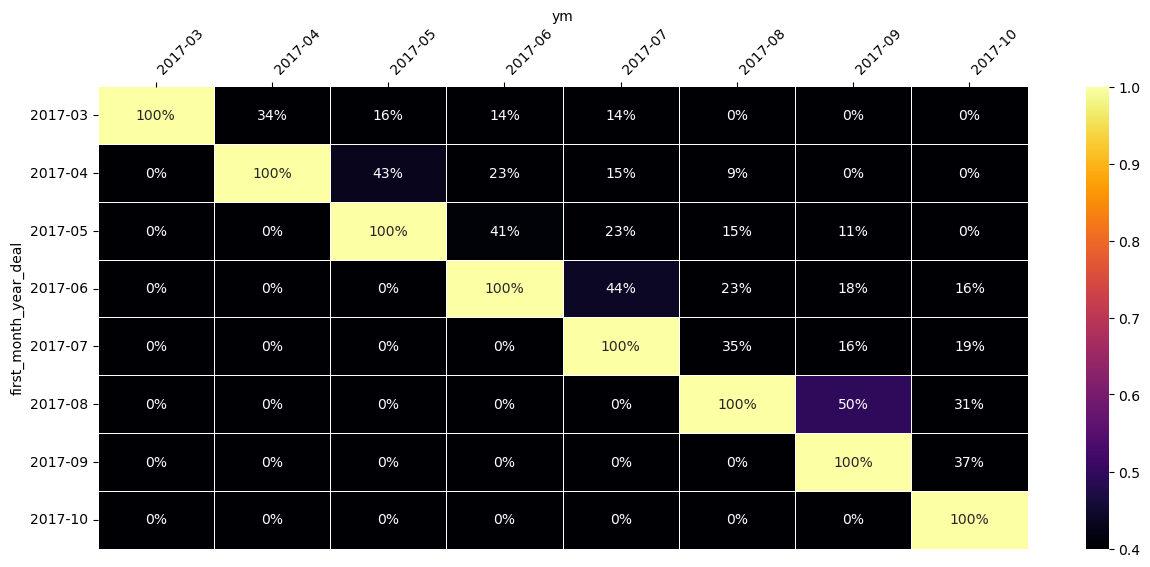

In [69]:
f, ax = plt.subplots(figsize=(15, 6))

sns.heatmap(
    cohorts,
    annot=True,
    fmt='.0%',
    linewidth=0.5,
    vmin=0.4,
    vmax=np.percentile(cohorts, 90),
    cmap='inferno'

);

ax.xaxis.set_label_position('top');
ax.xaxis.tick_top();

plt.xticks(rotation=45, ha='left');